# Clustering

First, load the scikit-learn package:

In [1]:
import sklearn

Filter warnings and import matplotlib

In [2]:
# add plot inline in the page
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['font.size'] = 16

import warnings  # Hide all warnings here
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Loading digits dataset

scikit-learn gives simple access to [public datasets](http://scikit-learn.org/stable/datasets/index.html)

In [3]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)   # contains 1797 images of 64 pixels
print(y.shape)
print(np.unique(y))

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


Let's look at some images

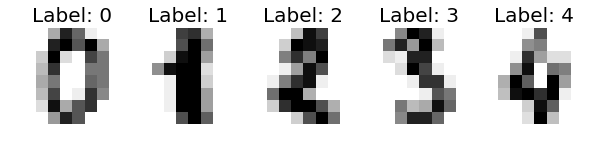

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, (i, x) in zip(axes, enumerate(X[:5])):
    img = x.reshape(8, 8)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % y[i], fontsize=20)
    ax.axis('off')

## Clustering

**Objective:** Regroup samples than are "similar"

We will work with a picture.

In [5]:
from sklearn.datasets import load_sample_image
# Load the Summer Palace photo
china = load_sample_image("china.jpg")
# Convert to floats in [0, 1]
china = np.array(china, dtype=np.float64) / 255
china.shape  # height, width, nb of colors

(427, 640, 3)

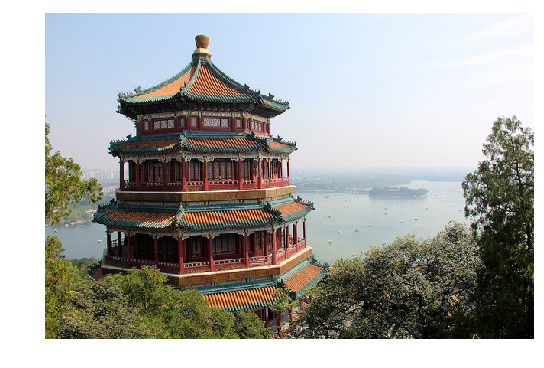

In [6]:
plt.imshow(china)
plt.axis('off');

**Objective:** regroup pixels with similar color

Let's format data for machine learning (n_samples, n_features)

**Idea:** One pixel is one sample in dimension 3

In [7]:
w, h, d = china.shape
X = np.reshape(china, (w * h, d))
print(X.shape)

(273280, 3)


In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels.shape)

(273280,)


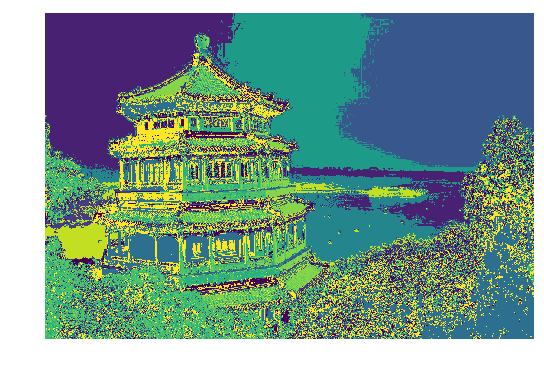

In [9]:
plt.imshow(labels.reshape(w, h))
plt.axis('off');